# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

## Przydatne funkcje


In [4]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(4, 1), (2, 2), (3, 5), (4, 7), (6, 6), (3, 9), (6, 8), (9, 10), (7, 4), (4, 3), (5, 0)]
polygon_example_colors = [4,4,4,4,3,0,2,0,4,4,1]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [5]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [7]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [8]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

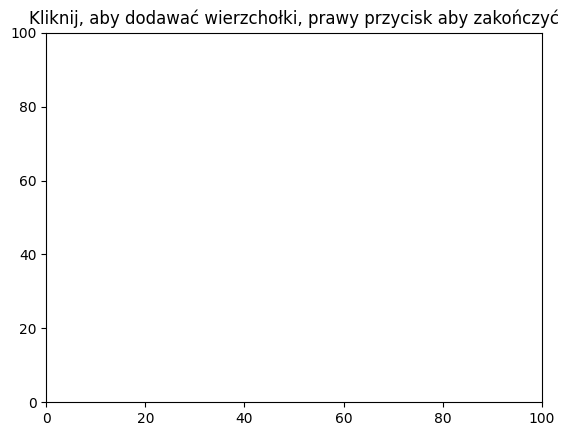

[]


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def create_polygon():    
    polygon = []
    lines = None

    def onclick(event):
        nonlocal polygon,lines
        if event.button == 1:
            polygon.append((event.xdata,event.ydata))
            if len(polygon) > 1:
                x, y = zip(*polygon)
                if lines:
                    lines.set_data(x, y)
                else:
                    lines, = ax.plot(x, y, marker='o', linestyle='-', color='b')
                plt.draw()

        elif event.button == 3 and len(polygon) > 2:  
            fig.canvas.mpl_disconnect(cid)
            plt.close()

    # Tworzenie wykresu
    fig, ax = plt.subplots()
    ax.set_xlim((0,100))
    ax.set_ylim((0,100))
    ax.set_title("Kliknij, aby dodawać wierzchołki, prawy przycisk aby zakończyć")

    # Dodanie obserwatora zdarzeń kliknięcia myszy
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()
    return polygon  

polygon = create_polygon()
print(polygon)

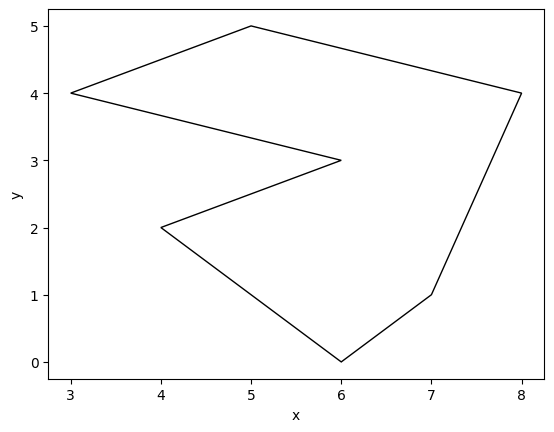

In [10]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [11]:
polygon = [(20.6989247311828, 19.98556998556998), (68.01075268817206, 20.887445887445885), (78.22580645161293, 70.3102453102453), (26.075268817204304, 91.41414141414141), (4.56989247311828, 47.76334776334776), (50.672043010752695, 39.82683982683982)]

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

In [12]:
def mat_det_2x2(a, b, c):
    return (a[0]-c[0])*(b[1]-c[1]) - (a[1]-c[1])*(b[0]-c[0])

In [13]:
def orient(a,b,c,eps = 10**(-20)):
    det = mat_det_2x2(a,b,c)
    if abs(det) < eps:
        return False
    elif det < 0:
        return True
    else:
        return False

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [14]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    start_point_bottom = min(polygon,key=lambda point: (point[1],point[0]))
    start_point_top = max(polygon,key=lambda point: (point[1],point[0]))
    index_start_bottom = polygon.index(start_point_bottom)
    index_start_top = polygon.index(start_point_top)

    for i in range(index_start_top+1,len(polygon)):
        if i == index_start_bottom:
            break
        if polygon[i][1] > polygon[i-1][1]:
            return False
        
        
    for i in range(index_start_top-1,-1,-1):
        if i == index_start_bottom:
            break
        if polygon[i][1] > polygon[i+1][1]:
            return False

    return True

Przeprowadź test poprawności powyższej funkcji.

In [15]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.016s


Sprawdź monotoniczność swojego wielokątu.

True


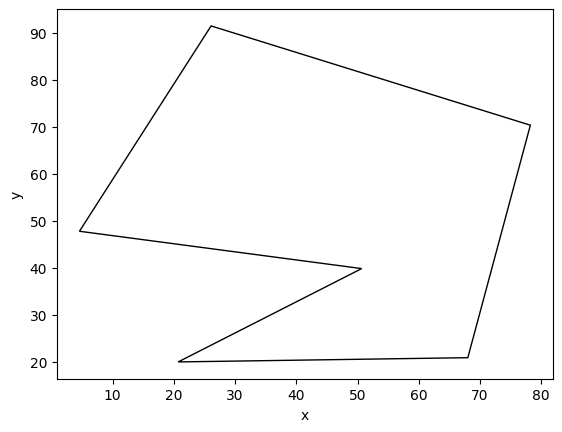

In [16]:
draw_polygon(polygon)
print(is_y_monotonic(polygon))

***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

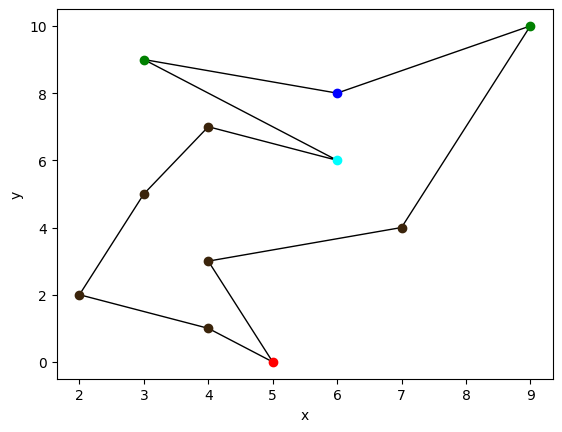

In [64]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [86]:
def find_color(A,B,C):
    det = mat_det_2x2(A,B,C)

    if A[1] < B[1] and C[1] < B[1] and det > 0:
        return 0
    elif A[1] > B[1] and C[1] > B[1] and det > 0:
        return 1
    elif A[1] > B[1] and C[1] > B[1] and det < 0:
        return 2
    elif A[1] < B[1] and C[1] < B[1] and det < 0:
        return 3
    
    return 4



In [87]:
def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n = len(polygon)
    polygon_vertices_colors = [None for _ in range(n)]
    
    for i in range(-1,n-1):
        polygon_vertices_colors[i] = find_color(polygon[i-1],polygon[i],polygon[i+1])



    return polygon_vertices_colors

Przeprowadź test poprawności powyższej funkcji. 

In [85]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

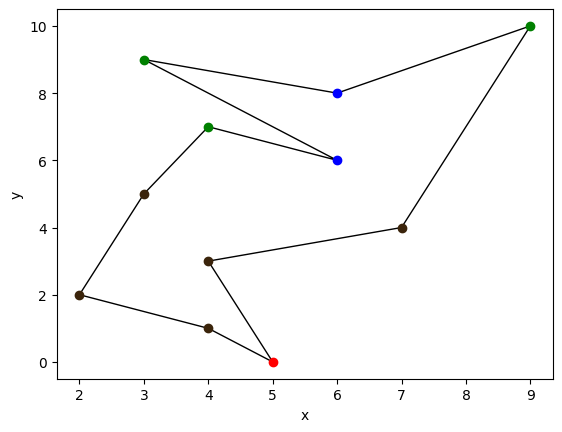

In [88]:
colors = color_vertex(polygon_example_2)
draw_polygon_colors(polygon_example_2,colors)

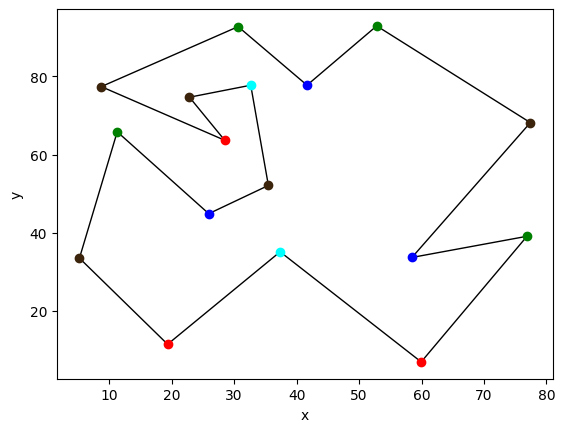

In [89]:
poly = [(30.645161290322584, 92.67676767676767), (41.66666666666667, 77.7056277056277), (52.8225806451613, 92.85714285714285), (77.4193548387097, 68.14574314574314), (58.46774193548388, 33.69408369408369), (76.88172043010755, 39.1053391053391), (59.9462365591398, 6.998556998556998), (37.365591397849464, 35.13708513708513), (19.354838709677423, 11.507936507936508), (5.241935483870968, 33.51370851370851), (11.29032258064516, 65.8008658008658), (25.940860215053767, 44.877344877344875), (35.48387096774194, 52.09235209235208), (32.66129032258065, 77.7056277056277), (22.8494623655914, 74.63924963924964), (28.494623655913983, 63.63636363636363), (8.736559139784948, 77.34487734487735)]
draw_polygon_colors(poly,color_vertex(poly))

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

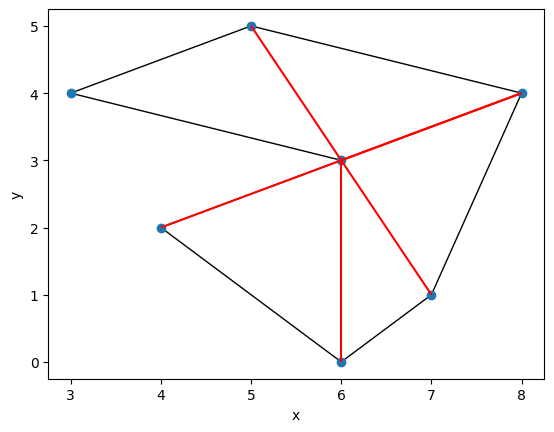

In [18]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [128]:
def triangulation_draw(polygon):
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    def neighbour(vertex1,vertex2,n):
        if abs(vertex1[2] - vertex2[2]) == 1:
            return True
        if (vertex1[2] == n-1 and vertex2[2] == 0) or (vertex2[2] == n-1 and vertex1[2] == 0):
            return True
        return False
    
    n = len(polygon)

    y_max_point = max(polygon,key= lambda x : x[1])
    y_max_point_index = polygon.index(y_max_point)
    y_min_point = min(polygon,key= lambda x : x[1])
    y_min_point_index = polygon.index(y_min_point)

    polygon_with_chains = []
    polygon_with_chains.append((y_max_point,True,y_max_point_index))
    polygon_with_chains.append((y_min_point,False,y_min_point_index))

    index = y_max_point_index
    index += 1
    index = index % n
    flag = polygon[index-2][0] < polygon[index][0]
    y_last = y_max_point[1] 
    while polygon[index] != y_min_point:
        if polygon[index][1] > y_last:
            return False
        polygon_with_chains.append((polygon[index],flag,index))
        y_last = polygon[index][1]
        index += 1
        index = index % n
        y_last = polygon[index][1]

    index = y_max_point_index
    index -= 1
    y_last = y_max_point[1]
    while polygon[index] != y_min_point:
        if polygon[index][1] > y_last:
            return False
        if index < 0:
            polygon_with_chains.append((polygon[index],not flag,n + index))
        else:
            polygon_with_chains.append((polygon[index],not flag,index))
        
        y_last = polygon[index][1]

        index -= 1

    polygon_with_chains.sort(key=lambda x : -x[0][1])
    
    vis = Visualizer()
    vis.add_polygon(polygon,fill = False)
    vis.add_point(polygon,color = "blue")
    stack = []
    stack.append(polygon_with_chains[0])
    stack.append(polygon_with_chains[1])
    vis.add_point(polygon_with_chains[0][0],color = "purple")
    vis.add_point(polygon_with_chains[1][0],color = "purple")
    diagonals = []

    for i in range(2,n):
        current_vertex = polygon_with_chains[i]
        vis.add_point(current_vertex[0],color = "green")
        if current_vertex[1] != stack[-1][1]:
            first_vertex_in_stack = stack[-1]

            while stack:
                stack_vertex = stack.pop()
                vis.add_point(stack_vertex[0],color = "blue")
                if not neighbour(stack_vertex,current_vertex,n):
                    diagonals.append([current_vertex[2],stack_vertex[2]])
                    vis.add_line_segment((current_vertex[0],stack_vertex[0]),color = "red")
        
            stack.append(first_vertex_in_stack)
            vis.add_point(first_vertex_in_stack[0],color = "purple")
            stack.append(current_vertex)
            vis.add_point(current_vertex[0],color = "purple")

        else:
            last = stack.pop()
            vis.add_point(last[0],color = "blue")
            while stack:
                stack_vertex = stack.pop()
                vis.add_point(stack_vertex[0],color = "blue")
                if not neighbour(stack_vertex,current_vertex,n):
                    if current_vertex[1] and mat_det_2x2(current_vertex[0],last[0],stack_vertex[0]) > 0:
                        diagonals.append([current_vertex[2],stack_vertex[2]])
                        vis.add_line_segment((current_vertex[0],stack_vertex[0]),color = "red")
                        last = stack_vertex
                    elif not current_vertex[1] and mat_det_2x2(current_vertex[0],last[0],stack_vertex[0]) < 0:
                        diagonals.append([current_vertex[2],stack_vertex[2]])
                        vis.add_line_segment((current_vertex[0],stack_vertex[0]),color = "red")
                        last = stack_vertex
                    else:
                        break

            stack.append(stack_vertex)
            vis.add_point(stack_vertex[0],color = "purple")
            stack.append(last)
            vis.add_point(last[0],color = "purple")
            stack.append(current_vertex)
            vis.add_point(current_vertex[0],color = "purple")

    for i in stack:
        vis.add_point(i[0],color = "blue")

    return diagonals,vis

    


In [129]:
def triangulation(polygon):
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    def neighbour(vertex1,vertex2,n):
        if abs(vertex1[2] - vertex2[2]) == 1:
            return True
        if (vertex1[2] == n-1 and vertex2[2] == 0) or (vertex2[2] == n-1 and vertex1[2] == 0):
            return True
        return False
    
    n = len(polygon)

    y_max_point = max(polygon,key= lambda x : x[1])
    y_max_point_index = polygon.index(y_max_point)
    y_min_point = min(polygon,key= lambda x : x[1])
    y_min_point_index = polygon.index(y_min_point)

    polygon_with_chains = []
    polygon_with_chains.append((y_max_point,True,y_max_point_index))
    polygon_with_chains.append((y_min_point,False,y_min_point_index))

    index = y_max_point_index
    index += 1
    index = index % n
    flag = polygon[index-2][0] < polygon[index][0]
    y_last = y_max_point[1] 
    while polygon[index] != y_min_point:
        if polygon[index][1] > y_last:
            return False
        polygon_with_chains.append((polygon[index],flag,index))
        y_last = polygon[index][1]
        index += 1
        index = index % n
        y_last = polygon[index][1]

    index = y_max_point_index
    index -= 1
    y_last = y_max_point[1]
    while polygon[index] != y_min_point:
        if polygon[index][1] > y_last:
            return False
        if index < 0:
            polygon_with_chains.append((polygon[index],not flag,n + index))
        else:
            polygon_with_chains.append((polygon[index],not flag,index))
        
        y_last = polygon[index][1]

        index -= 1

    polygon_with_chains.sort(key=lambda x : -x[0][1])
    
    vis = Visualizer()
    vis.add_polygon(polygon,fill = False)
    stack = []
    stack.append(polygon_with_chains[0])
    stack.append(polygon_with_chains[1])
    diagonals = []

    for i in range(2,n):
        current_vertex = polygon_with_chains[i]
        if current_vertex[1] != stack[-1][1]:
            first_vertex_in_stack = stack[-1]

            while stack:
                stack_vertex = stack.pop()
                if not neighbour(stack_vertex,current_vertex,n):
                    diagonals.append([current_vertex[2],stack_vertex[2]])
        
            stack.append(first_vertex_in_stack)
            stack.append(current_vertex)

        else:
            last = stack.pop()
            while stack:
                stack_vertex = stack.pop()
                if not neighbour(stack_vertex,current_vertex,n):
                    if current_vertex[1] and mat_det_2x2(current_vertex[0],last[0],stack_vertex[0]) > 0:
                        diagonals.append([current_vertex[2],stack_vertex[2]])
                        last = stack_vertex
                    elif not current_vertex[1] and mat_det_2x2(current_vertex[0],last[0],stack_vertex[0]) < 0:
                        diagonals.append([current_vertex[2],stack_vertex[2]])
                        last = stack_vertex
                    else:
                        break

            stack.append(stack_vertex)
            stack.append(last)
            stack.append(current_vertex)
            


    return diagonals

    


Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [130]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zielony kolor w symulacji oznacza przetwarzany wierzchołek a fioletowe obecnie znajdujące się na stosie

Zwizualizuj powstały wielokąt podzielony na trójkąty.

In [131]:
def change_diagonals(polygon,tri):
    diagonals = []
    for v,u in tri:
        diagonals.append((polygon[v],polygon[u]))

    return diagonals

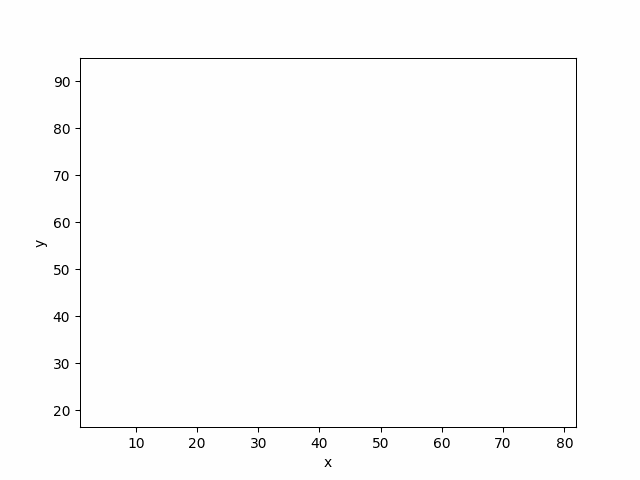

In [133]:
tri,vis = triangulation_draw(polygon)
vis.show_gif(interval=600)
# draw_polygon_tri(polygon,change_diagonals(polygon,tri))

Trójkąt

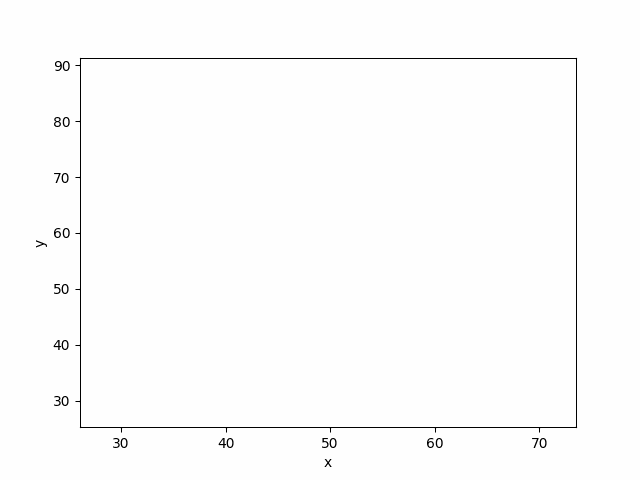

In [ ]:
polygon1 = [(28.225806451612904, 76.44300144300144), (71.37096774193549, 88.34776334776335), (63.03763440860215, 28.282828282828277)]
tri1,vis1 = triangulation_draw(polygon1)
vis1.show_gif()

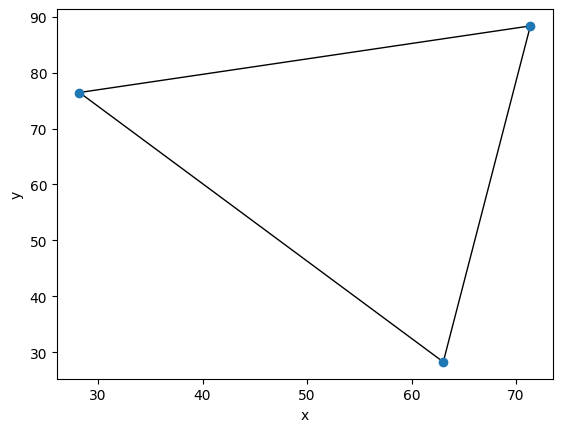

In [ ]:
draw_polygon_tri(polygon1,change_diagonals(polygon1,tri1))

Czworokąt

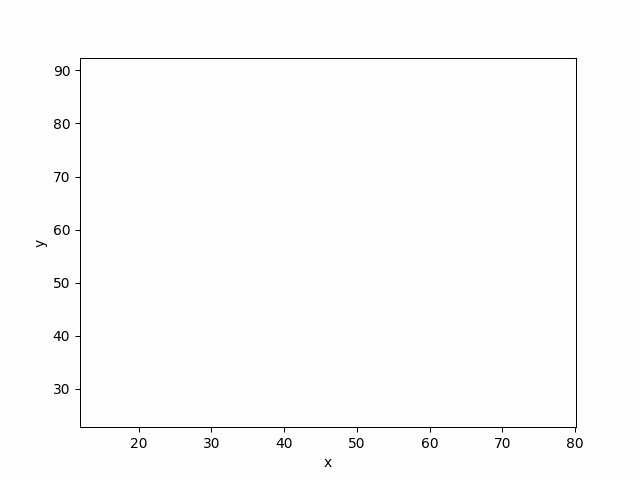

In [ ]:
polygon2 = [(15.053763440860216, 55.699855699855696), (45.29569892473119, 89.24963924963924), (77.01612903225808, 49.92784992784993), (38.172043010752695, 25.937950937950937)]
tri2,vis2 = triangulation_draw(polygon2)
vis2.show_gif()

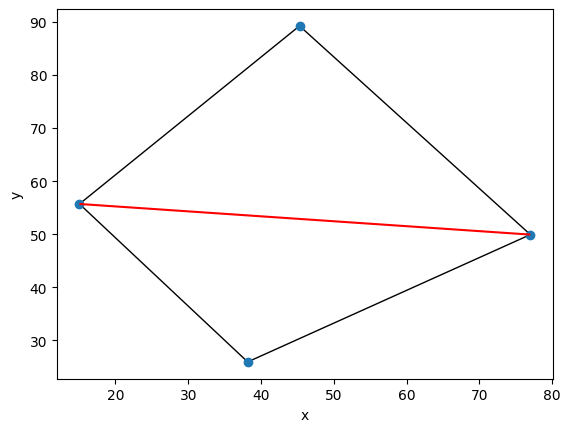

In [ ]:
draw_polygon_tri(polygon2,change_diagonals(polygon2,tri2))

pięciokąt

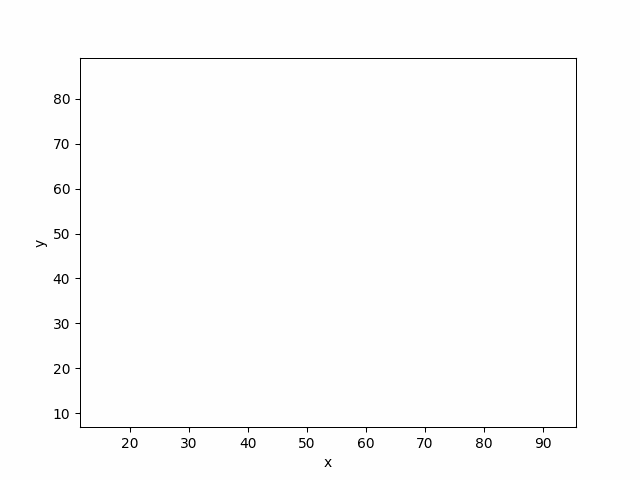

In [ ]:
polygon3 = [(16.801075268817208, 82.03463203463203), (70.56451612903226, 85.46176046176046), (91.80107526881721, 43.61471861471861), (63.30645161290324, 10.606060606060607), (15.322580645161292, 38.74458874458874)]
tri3,vis3 = triangulation_draw(polygon3)
vis3.show_gif()

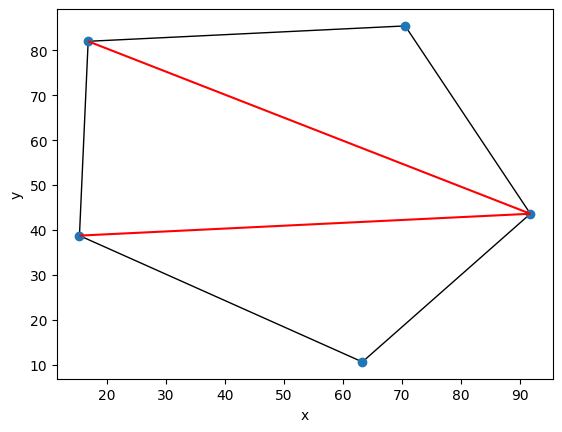

In [ ]:
draw_polygon_tri(polygon3,change_diagonals(polygon3,tri3))

sześciokąt

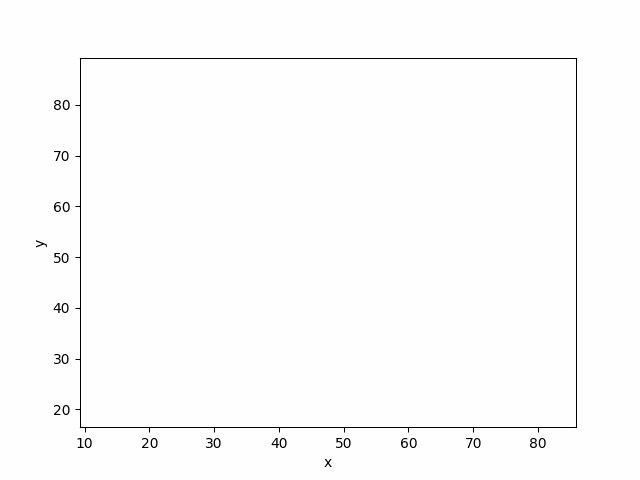

In [ ]:
polygon4 = [(28.62903225806452, 86.002886002886), (82.39247311827958, 79.32900432900432), (81.3172043010753, 39.82683982683982), (50.53763440860215, 19.8051948051948), (63.44086021505377, 58.94660894660894), (12.768817204301076, 59.3073593073593)]
tri4 , vis4= triangulation_draw(polygon4)
vis4.show_gif()

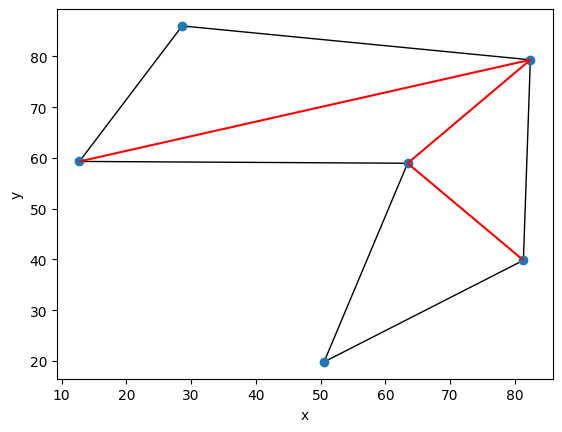

In [ ]:
draw_polygon_tri(polygon4,change_diagonals(polygon4,tri4))

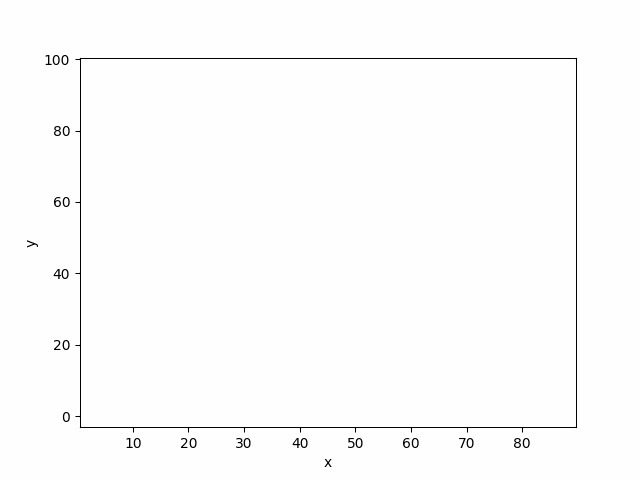

In [ ]:
polygon5 = [(31.31720430107527, 95.74314574314575), (82.52688172043011, 85.82251082251082), (55.24193548387097, 74.0981240981241), (85.61827956989248, 59.12698412698412), (54.973118279569896, 47.76334776334776), (85.21505376344086, 35.317460317460316), (56.72043010752689, 21.067821067821065), (83.87096774193549, 5.014430014430014), (46.102150537634415, 1.5873015873015888), (4.56989247311828, 16.738816738816737), (58.06451612903226, 35.317460317460316), (6.85483870967742, 50.288600288600286), (63.70967741935484, 58.04473304473304), (8.06451612903226, 70.85137085137085), (52.68817204301076, 82.03463203463203), (11.021505376344088, 91.41414141414141)]
tri5,vis5 = triangulation_draw(polygon5)
vis5.show_gif()

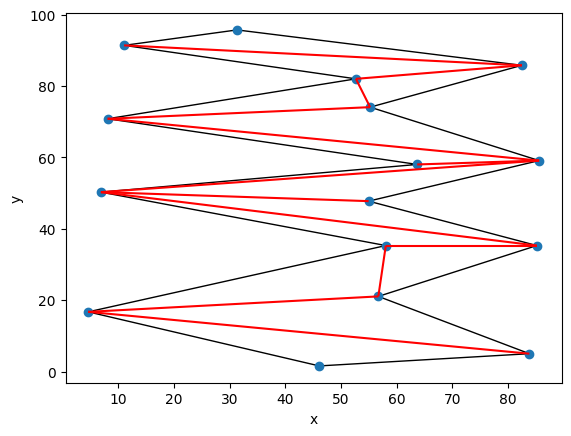

In [ ]:
draw_polygon_tri(polygon5,change_diagonals(polygon5,tri5))

figura nie y- monotoniczna

In [ ]:
polygon6 = [(41.935483870967744, 88.16738816738817), (91.80107526881721, 47.041847041847035), (71.63978494623657, 18.722943722943718), (51.88172043010753, 49.2063492063492), (36.4247311827957, 25.937950937950937), (22.580645161290327, 50.829725829725824)]
if not triangulation(polygon6):
    print("nie monotoniczny")
# tri6,vis6 = triangulation(polygon6)
# vis6.show_gif()

nie monotoniczny


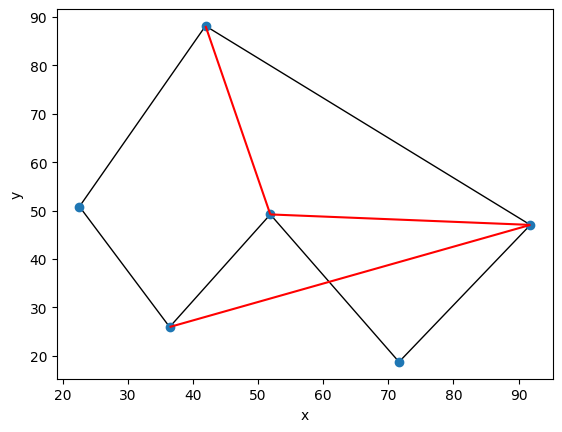

In [ ]:
draw_polygon_tri(polygon6,change_diagonals(polygon6,tri6))

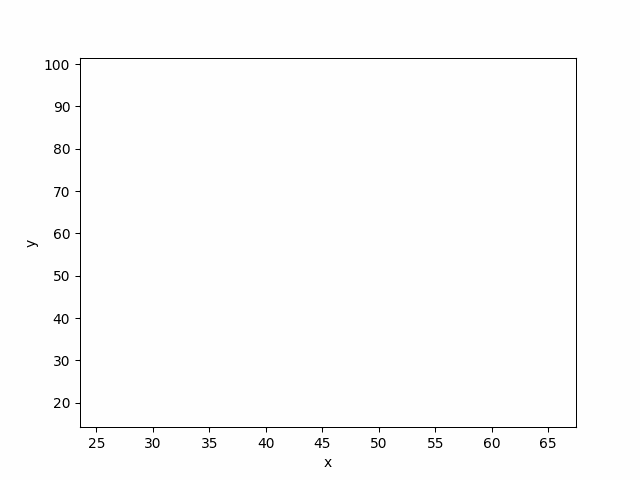

In [ ]:
polygon7 = [(25.537634408602152, 18.18181818181818), (63.44086021505377, 33.15295815295815), (36.29032258064517, 43.434343434343425), (61.693548387096776, 57.32323232323231), (42.20430107526882, 66.88311688311688), (58.333333333333336, 70.85137085137085), (51.612903225806456, 79.50937950937951), (65.45698924731184, 88.52813852813853), (43.81720430107527, 97.54689754689754)]
tri7,vis7 = triangulation_draw(polygon7)
vis7.show_gif()

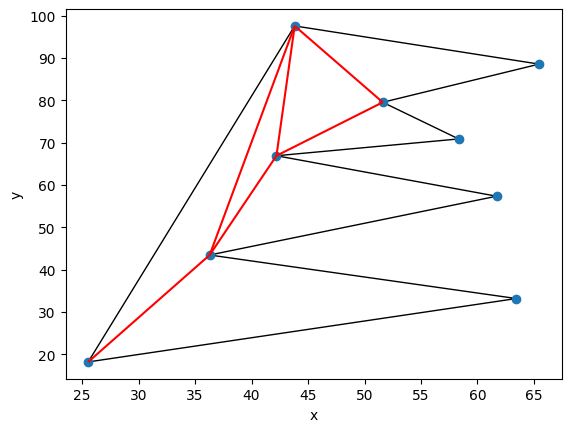

In [ ]:
draw_polygon_tri(polygon7,change_diagonals(polygon7,tri7))